# Faces detection: The Eigenfaces method

Silia Georgaki

# Description

A dataset is provided that contains face images, in matlab format:
Olivetti.mat. The dataset consists of images of 40 different faces, with
each face being imaged 10 times. Each image consists of 64 × 64 (rows ×
columns).

The purpose of this exercise is to apply the method of Principal
Component Analysis, in order to identify different faces:

1.  Divide the dataset into training and test subset (the intersection
    of the two subsets must be empty, but all 40 persons must be
    included in both subsets).

2.  Apply the method of PCA to the training set and define the required
    number of eigenvalues.

3.  Identify each of the faces in the remaining test set, as following:

    1.  For each unknown face:

        1.  Calculate its projection to each of the eigenfaces
        2.  Use the projections as features to classify the unknown face
            into one of the 40 different faces (you may use any
            classifier of your choice)

4.  Create the (40x40) Confusion matrix

# Import necessary libraries

In [1]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Load and Preprocess Data

In [2]:
# Load raw data from the given file path
raw_data = loadmat(r'olivetti.mat')

# Extract 'X' values and labels from raw data
faces = raw_data['X']
labels = raw_data['label'].ravel()

# Print information about the dataset
print(f'The dataset contains {faces.shape[0]} faces/images of size (64 x 64) pixels and {len(labels)} corresponding labels.')

# Create a DataFrame from the 'faces' data
df = pd.DataFrame(faces.T, columns = [str(i + 1) for i in range(faces.shape[0])])

# Reshape the data into images
images = df.to_numpy().reshape(64, 64, -1)
images = np.rot90(images, 3)
images = images.transpose((2, 0, 1))

The dataset contains 400 faces/images of size (64 x 64) pixels and 400 corresponding labels.

# Visualize Original Images

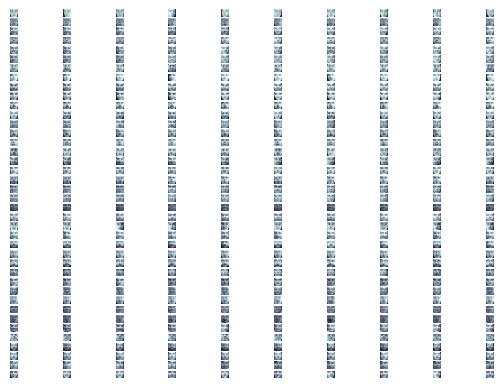

In [3]:
# Plot the images
fig, axs = plt.subplots(40, 10)
fig.tight_layout()
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i], cmap = 'bone')
    ax.axis('off')
plt.show()

# Train-Test Split

In [4]:
# Transpose the DataFrame
df_transposed = df.transpose()

# Split the data using StratifiedShuffleSplit
shufflesplit = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)

for train_index, test_index in shufflesplit.split(df_transposed, labels):
    X_train = df_transposed.iloc[train_index]
    X_test = df_transposed.iloc[test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]

# Principal Component Analysis (PCA)

In [5]:
# Apply PCA
pca = PCA(n_components = 150, whiten = True)
pca.fit(X_train)
# Compute the mean face and plot it
mean_face = np.mean(images, axis = 0)

# Visualize Mean Face

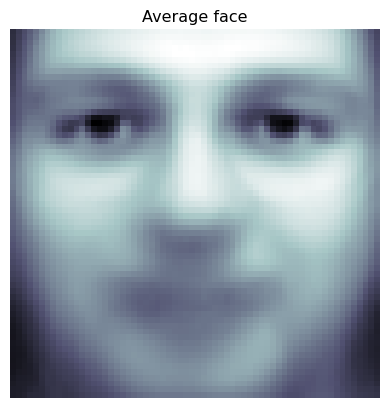

In [6]:
plt.imshow(mean_face, cmap = plt.cm.bone)
plt.axis('off')
plt.title("Average face")
plt.show()

# Evaluate Number of Principal Components

In [7]:
# Calculate explained variance
total_variance = np.sum(pca.explained_variance_)
explained_variance_percentage = (pca.explained_variance_ / total_variance) * 100

# Print explained variance information
print("\nTotal Variance:", total_variance)
print("Explained Variance Percentage for each component:\n", explained_variance_percentage)

# Find the number of components to retain 95% of total variance
cumulative_explained_variance = np.cumsum(explained_variance_percentage)
num_components = np.argmax(cumulative_explained_variance >= 95) + 1
print(f'\nNumber of components that explain 95% of total variance: {num_components}\n')


Total Variance: 4521389.151375578
Explained Variance Percentage for each component:
 [25.41125705 13.2421554   8.36192947  5.04359924  3.7577047   3.32267903
  2.5765804   2.21339898  1.95191519  1.75264897  1.62635953  1.51612569
  1.31776569  1.26629639  1.13934489  1.00329141  0.91634111  0.85199937
  0.78813607  0.77580673  0.72973494  0.62689646  0.62149834  0.59393609
  0.57311315  0.55623771  0.52745169  0.51316094  0.49499128  0.46393805
  0.45156481  0.40927687  0.38783677  0.37450606  0.34598102  0.33506037
  0.32930026  0.32434687  0.30747646  0.29142997  0.28816874  0.27761803
  0.27333021  0.26080343  0.25293902  0.24763897  0.24621661  0.23240995
  0.22725219  0.22518974  0.21290564  0.20556947  0.19925133  0.19407119
  0.19070068  0.18441256  0.18234456  0.17898645  0.17264254  0.17088397
  0.16554723  0.16302253  0.15721656  0.15230607  0.15082624  0.14740077
  0.14540176  0.14449246  0.1391232   0.13697281  0.1357887   0.13295686
  0.12952066  0.12436594  0.12189214  

# Plot Explained Variance

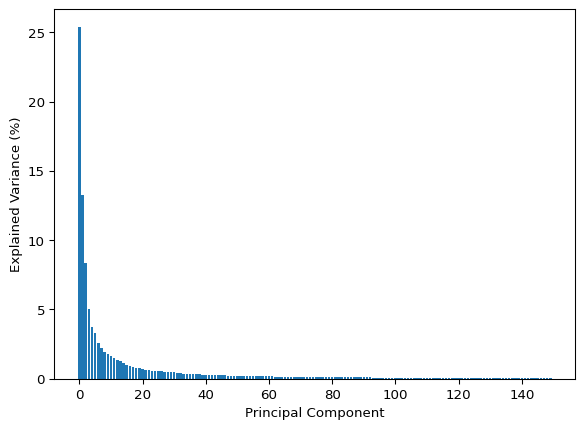

In [8]:
# Plot explained variance percentage
plt.bar(range(len(explained_variance_percentage)), explained_variance_percentage)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.show()

# SVM Classification

In [9]:
# Project the data onto the PCA basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM classifier
clf = SVC(C = 5., gamma = 0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. SVC SVC(C=5.0, gamma=0.001)

# Evaluate Model

In [10]:
# Make predictions and evaluate the model
y_pred = clf.predict(X_test_pca)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
   

# Confusion Matrix

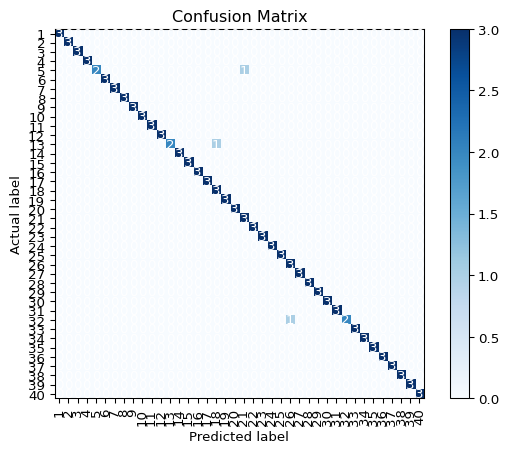

In [11]:
confusion_mat = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure()
plt.imshow(confusion_mat, interpolation='nearest', cmap = plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(labels)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)

# Add annotations to the confusion matrix cells
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(confusion_mat[i, j]), ha = 'center', va = 'center', color = 'white')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()